In [1]:
import pandas as pd

x_data = pd.read_csv("x_phot.csv")
id_data = pd.read_csv("id_frame.csv")

In [2]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     13880 non-null  object 
 1   gal_b2                   13880 non-null  float64
 2   gal_l2                   13880 non-null  float64
 3   hard_hs                  12501 non-null  float64
 4   hard_hm                  12512 non-null  float64
 5   hard_ms                  12433 non-null  float64
 6   var_inter_prob_b         6613 non-null   float64
 7   var_inter_sigma_b        6613 non-null   float64
 8   var_intra_prob_b         12758 non-null  float64
 9   var_inter_index_b        6613 non-null   float64
 10  kp_intra_prob_b          12758 non-null  float64
 11  var_intra_index_b        12758 non-null  float64
 12  var_inter_hard_prob_hs   4898 non-null   float64
 13  ks_intra_prob_b          12758 non-null  float64
 14  var_inter_hard_sigma_h

In [3]:
id_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             13880 non-null  object 
 1   catalog          13880 non-null  object 
 2   class            13880 non-null  object 
 3   significance     13880 non-null  float64
 4   cat_name         13880 non-null  object 
 5   var_flag         13880 non-null  int64  
 6   streak_src_flag  13880 non-null  int64  
 7   pileup_flag      13880 non-null  int64  
 8   ra               13880 non-null  float64
 9   dec              13880 non-null  float64
 10  offset           13880 non-null  float64
 11  missing          13880 non-null  float64
 12  sat_src_flag     13880 non-null  int64  
 13  extent_flag      13880 non-null  int64  
 14  conf_flag        13880 non-null  int64  
 15  cat_ra           13880 non-null  float64
 16  cat_dec          13880 non-null  float64
dtypes: float64(7

In [4]:
x_column_list = x_data.columns.tolist()

In [6]:
x = x_data[(x_column_list[3:])]

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hard_hs                  12501 non-null  float64
 1   hard_hm                  12512 non-null  float64
 2   hard_ms                  12433 non-null  float64
 3   var_inter_prob_b         6613 non-null   float64
 4   var_inter_sigma_b        6613 non-null   float64
 5   var_intra_prob_b         12758 non-null  float64
 6   var_inter_index_b        6613 non-null   float64
 7   kp_intra_prob_b          12758 non-null  float64
 8   var_intra_index_b        12758 non-null  float64
 9   var_inter_hard_prob_hs   4898 non-null   float64
 10  ks_intra_prob_b          12758 non-null  float64
 11  var_inter_hard_sigma_hm  4967 non-null   float64
 12  var_inter_hard_prob_ms   5156 non-null   float64
 13  var_inter_hard_prob_hm   5188 non-null   float64
 14  h-csc                 

In [8]:
null_values = x.isnull().any()                #To see if there is any null
null_values

hard_hs                    True
hard_hm                    True
hard_ms                    True
var_inter_prob_b           True
var_inter_sigma_b          True
var_intra_prob_b           True
var_inter_index_b          True
kp_intra_prob_b            True
var_intra_index_b          True
var_inter_hard_prob_hs     True
ks_intra_prob_b            True
var_inter_hard_sigma_hm    True
var_inter_hard_prob_ms     True
var_inter_hard_prob_hm     True
h-csc                      True
b-csc                      True
m-csc                      True
s-csc                      True
u-csc                      True
0p3_8_csc                  True
0p5_2csc                   True
FUV                        True
NUV                        True
u-sdss                     True
g-sdss                     True
r-sdss                     True
i-sdss                     True
z-sdss                     True
W1                         True
W2                         True
W3                         True
W4      

In [9]:
x = x.astype(float)       #To convert into float

In [10]:
x_columns = x.columns.tolist()               #In order to find mode and fill values with that

for i in range(len(x_columns)):
    x[x_columns[i]] = x[x_columns[i]].fillna(x[x_columns[i]].mode().iloc[0])

In [10]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

#Here I tried initialization maximization with kNN imputation as its start

def em_with_knn(data, max_iter=100, tolerance=1e-6, k_neighbors=5):
    # Convert data to a NumPy array to work with KNN imputer
    data = np.array(data)
    
    # Copy the data to avoid modifying the original data
    imputed_data = data.copy()
    
    # Find the indices of missing values in the data
    missing_indices = np.isnan(data)
    
    # Initialize missing values using KNN imputation
    knn_imputer = KNNImputer(n_neighbors=k_neighbors)
    imputed_data[missing_indices] = knn_imputer.fit_transform(data)[missing_indices]
    
    num_rows, num_cols = data.shape

    for iteration in range(max_iter):
        # Expectation step: Estimate the missing values using the current imputed data
        for i in range(num_rows):
            for j in range(num_cols):
                if np.isnan(data[i, j]):
                    # Calculate the conditional expectation for the missing value
                    numerator = np.sum(imputed_data[:, j]) - imputed_data[i, j]
                    denominator = num_rows - 1
                    imputed_data[i, j] = numerator / denominator
        
        # Check for convergence
        if np.abs(imputed_data[missing_indices] - data[missing_indices]).max() < tolerance:
            break
    
    return imputed_data

x_imputed = em_with_knn(x, max_iter=100, tolerance=1e-6, k_neighbors=5)
print(x_imputed)

[[-0.792005   -0.0587133  -0.73329169 ...  0.8201211   1.94030696
   0.60226324]
 [-0.96189881 -0.80324797 -0.6945659  ...  0.8201211   1.94030696
   0.60226324]
 [-0.18238601  0.08994379 -0.2660837  ...  0.8201211   1.94030696
   0.60226324]
 ...
 [-0.93816365 -0.77701437 -0.59212992 ...  0.8201211   1.94030696
   0.60226324]
 [-0.11955671  0.06766221 -0.21868953 ...  0.8201211   1.94030696
   0.60226324]
 [-0.7207995  -0.25608994 -0.56714553 ...  0.643       1.94030696
   0.60226324]]


In [12]:
df = pd.DataFrame(x_imputed, columns=x_column_list[3:])

In [13]:
df.to_csv("x_phot_imputed.csv")

In [12]:
null_values = x.isnull().any()
null_values

hard_hs                    False
hard_hm                    False
hard_ms                    False
var_inter_prob_b           False
var_inter_sigma_b          False
var_intra_prob_b           False
var_inter_index_b          False
kp_intra_prob_b            False
var_intra_index_b          False
var_inter_hard_prob_hs     False
ks_intra_prob_b            False
var_inter_hard_sigma_hm    False
var_inter_hard_prob_ms     False
var_inter_hard_prob_hm     False
h-csc                      False
b-csc                      False
m-csc                      False
s-csc                      False
u-csc                      False
0p3_8_csc                  False
0p5_2csc                   False
FUV                        False
NUV                        False
u-sdss                     False
g-sdss                     False
r-sdss                     False
i-sdss                     False
z-sdss                     False
W1                         False
W2                         False
W3        

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_x = scaler.fit_transform(x)            # I normalized to mean 0 std 1

In [27]:
import numpy as np
y= np.array(id_data.iloc[:,2])

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# I was trying to see how it behaves

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gbdt = GradientBoostingClassifier()

# Train the model
gbdt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbdt.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7961095100864554


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert target variable to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Calculate class weights
class_counts = np.bincount(y_train_encoded)
total_samples = len(y_train_encoded)
class_weights = total_samples / (len(class_counts) * class_counts)

# Create the classifier
classifier = GradientBoostingClassifier()

# Fit the classifier on the training data with sample weights
classifier.fit(X_train, y_train_encoded, sample_weight=class_weights[y_train_encoded])

# Make predictions on the test set
y_pred = classifier.predict(X_test)

y_test_encoded = label_encoder.fit_transform(y_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

In [32]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder

# I was simply trying to optimize it and haven't done k fold at that time

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=42)

# Convert target variable to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Calculate class weights
class_counts = np.bincount(y_train_encoded)
total_samples = len(y_train_encoded)
class_weights = total_samples / (len(class_counts) * class_counts)

def objective(trial):
    # Define the search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }
    
    # Create the classifier with the suggested hyperparameters
    classifier = GradientBoostingClassifier(**params)
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train, sample_weight=class_weights[y_train_encoded])
    
    # Predict on the validation data
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy as the objective to optimize
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy



# Define the Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


[I 2023-07-12 11:04:49,650] A new study created in memory with name: no-name-c4617906-e1e3-4e14-8e6e-a616da04e3ae
/tmp/ipykernel_217790/1433134372.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
[I 2023-07-12 11:08:37,300] Trial 0 finished with value: 0.7262247838616714 and parameters: {'n_estimators': 183, 'learning_rate': 0.02360024110418762, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7262247838616714.
/tmp/ipykernel_217790/1433134372.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate'

KeyboardInterrupt: 

In [33]:
from sklearn.preprocessing import LabelEncoder

# Get the best hyperparameters
best_params = study.best_params

# Train a new model with the best hyperparameters using all the training data
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Inverse transform the predicted and  test labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)
# Generate the classification report
report = classification_report(y_test_labels, y_pred_labels)
print(report)

# Print the best hyperparameters and accuracy
best_accuracy = study.best_value
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

LightGBM analysis and also applying SMOTE

In [1]:
import pandas as pd
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from imblearn.over_sampling import SMOTE

x = pd.read_csv("x_phot.csv")
id_data = pd.read_csv("id_frame.csv")
y = id_data.iloc[:,2]

In [2]:
x_columns = x.columns.tolist()

for i in range(len(x_columns)):
    x[x_columns[i]] = x[x_columns[i]].fillna(x[x_columns[i]].mode().iloc[0])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_x = scaler.fit_transform(x.iloc[:,1:])    

In [3]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Your data and label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train = np.array(normalized_x)      # This is full array only and just wrote X_train, no significance

# Define hyperparameters for LightGBM
params = {
    "objective": "multiclass",
    "num_class": len(label_encoder.classes_),
    #from recall
    'learning_rate': 0.005072494533969741, 'max_depth': 11, 'num_leaves': 128, 'min_child_samples': 20
    
    # These are from f1 score or accuracy when optimized
    #'learning_rate': 0.0017606453802313671, 'max_depth': 8, 'num_leaves': 32, 'min_child_samples': 30
    
    #'learning_rate': 0.0029306471619698704, 'max_depth': 9, 'num_leaves': 64, 'min_child_samples': 10
    
    #'learning_rate': 0.005948119737907966, 'max_depth': 2, 'min_child_samples': 1, 'num_leaves': 3
    
    #'learning_rate': 0.01664579008172116, 
    #'max_depth': 5, 
    #'min_child_samples': 2, 
    #'num_leaves': 3
}

# Create the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(**params)

# Create a preprocessing pipeline that includes SMOTE
smote_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto',k_neighbors=4)),
    ('lgb', lgb_classifier)
])

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=20, shuffle=True)

# Train the LightGBM model using cross-validation with SMOTE
y_pred = cross_val_predict(smote_pipeline, X_train, y_encoded, cv=cv)

# Convert the predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_labels = label_encoder.inverse_transform(y_encoded)

# Calculate and print accuracy
accuracy = accuracy_score(y_labels, y_pred_labels)
print("Accuracy:", accuracy)






[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 37296, number of used features: 57
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009110 seconds.
You can set `force

Confusion Matrix:
[[4570   48   76    1   32   60  119    1]
 [  18  200   20   13   55   27   14   13]
 [  15   13  696    8   26   37   58    9]
 [   1   16    5  126   11   18    5   20]
 [   1   24    2    4   80   17    8   22]
 [  90   94  117   23  228 3667   58  313]
 [  37   14   29    5   16   10  170    0]
 [   2   22    2   13   55   65    4 2357]]


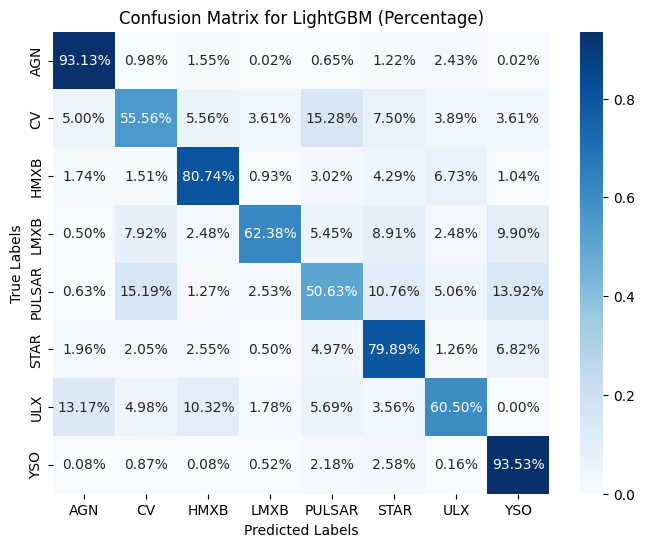

Classification Report:
              precision    recall  f1-score   support

         AGN       0.97      0.93      0.95      4907
          CV       0.46      0.56      0.51       360
        HMXB       0.73      0.81      0.77       862
        LMXB       0.65      0.62      0.64       202
      PULSAR       0.16      0.51      0.24       158
        STAR       0.94      0.80      0.86      4590
         ULX       0.39      0.60      0.47       281
         YSO       0.86      0.94      0.90      2520

    accuracy                           0.85     13880
   macro avg       0.65      0.72      0.67     13880
weighted avg       0.89      0.85      0.87     13880



In [4]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap with percentage values
class_names = label_encoder.classes_
plt.figure(figsize=(8, 6))
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2%', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LightGBM (Percentage)')
plt.show()

# Print classification report
class_report = classification_report(y_labels, y_pred_labels)
print("Classification Report:")
print(class_report)

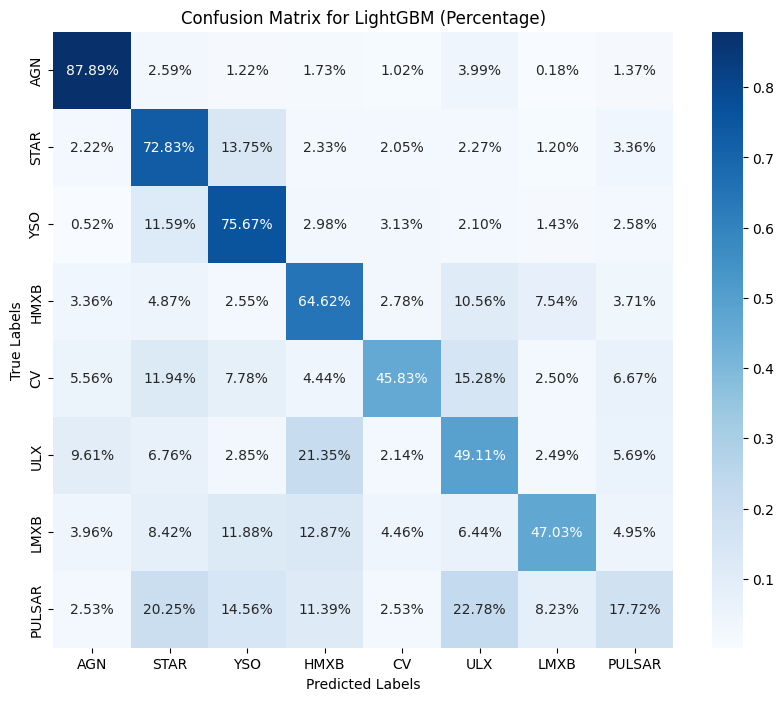

Classification Report:
              precision    recall  f1-score   support

         AGN       0.96      0.88      0.92      4907
        STAR       0.38      0.46      0.42       360
         YSO       0.59      0.65      0.62       862
        HMXB       0.33      0.47      0.39       202
          CV       0.07      0.18      0.10       158
         ULX       0.85      0.73      0.79      4590
        LMXB       0.20      0.49      0.29       281
      PULSAR       0.71      0.76      0.73      2520

    accuracy                           0.76     13880
   macro avg       0.51      0.58      0.53     13880
weighted avg       0.80      0.76      0.78     13880



In [4]:
#Btw the same code as above but I used expectation maximization with knn imputed 
#So I got this then sir recommended me to use mode only



# Convert the string labels back to integer labels
y_labels_int = label_encoder.transform(y_labels)

# Calculate the count of each class in the dataset
class_counts = np.bincount(y_labels_int)

# Sort the classes based on their counts in descending order
sorted_class_indices = np.argsort(class_counts)[::-1]
sorted_class_names = label_encoder.inverse_transform(sorted_class_indices)
sorted_conf_matrix = conf_matrix[sorted_class_indices][:, sorted_class_indices]

# Plot the confusion matrix with sorted class names
plt.figure(figsize=(10, 8))
conf_matrix_percentage_sorted = sorted_conf_matrix / sorted_conf_matrix.sum(axis=1, keepdims=True)
sns.heatmap(conf_matrix_percentage_sorted, annot=True, cmap='Blues', fmt='.2%', xticklabels=sorted_class_names, yticklabels=sorted_class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LightGBM (Percentage)')
plt.show()

# Convert integer labels to string labels for classification report
y_labels_str = label_encoder.inverse_transform(y_labels_int)
y_pred_labels_str = label_encoder.inverse_transform(y_pred)

# Print classification report with sorted class names
class_report_sorted = classification_report(y_labels_str, y_pred_labels_str, target_names=sorted_class_names)
print("Classification Report:")
print(class_report_sorted)

In [10]:
# Just for fun I tried Principal component analysis 

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Specify the desired number of components
pca_result = pca.fit_transform(x)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

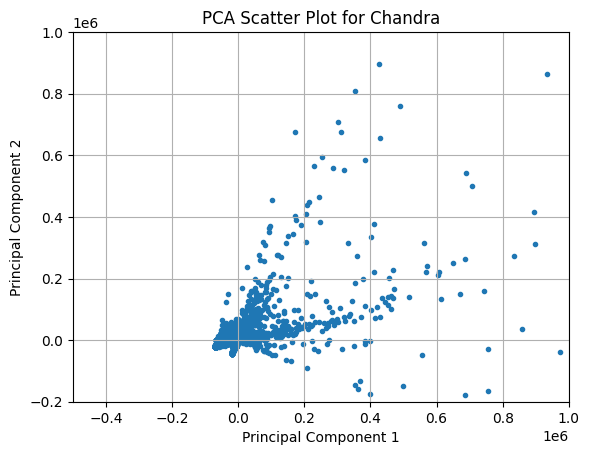

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1],marker='.')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot for Chandra')
plt.grid()

# Add additional customization as needed
plt.xlim(-0.5e6,1e6)
plt.ylim(-0.2e6,1e6)
# Show the plot
plt.show()

In [2]:
from imblearn.over_sampling import SMOTE

# Assuming X and y represent the full dataset

# Step 1: Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Step 2: Apply SMOTE to your data
X_resampled, y_resampled = smote.fit_resample(x, y)

In [13]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score,precision_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from hyperopt import hp, fmin, tpe, Trials

# I used hyperopt but the result was not good so next I tried optuna

# My data and label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X = np.array(x)

# Define hyperparameters for LightGBM
params = {
    "objective": "multiclass",
    "num_class": len(label_encoder.classes_),
}

# Create the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(**params)

# Create a preprocessing pipeline that includes SMOTE
smote_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto',k_neighbors=4)),
    ('lgb', lgb_classifier)
])

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=20, shuffle=True)

space = {
    "objective": "multiclass",
    "num_class": 8,  
    "learning_rate": hp.loguniform("learning_rate", np.log(0.001), np.log(0.1)),
    "max_depth": hp.choice("max_depth", range(5, 11)),  # Update the range as needed
    "num_leaves": hp.choice("num_leaves", [2 ** i for i in range(3, 8)]),  # Update the range as needed
    "min_child_samples": hp.choice("min_child_samples", [10, 20, 30]),
}

# Define the objective function for hyperopt
def objective(params):
    # Train the LightGBM model using cross-validation with SMOTE
    y_pred = cross_val_predict(smote_pipeline, X, y_encoded, cv=cv)

    # Convert the predictions back to original labels
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_labels = label_encoder.inverse_transform(y_encoded)

    # Calculate and print accuracy
    #f1 = f1_score(y_labels, y_pred_labels, average='weighted')  # Use 'weighted' for multiclass problems
    macro_precision = precision_score(y_encoded, y_pred, average='macro')
    return -macro_precision  # Hyperopt minimizes the objective function

# Set up Trials object to track optimization process
trials = Trials()

# Run hyperparameter optimization
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials,
)

# Print the best hyperparameters found
print("Best hyperparameters:", best)

# Print the hyperparameters after each trial
for trial in trials.trials:
    print(trial)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14280                    
[LightGBM] [Info] Number of data points in the train set: 37296, number of used features: 56
[LightGBM] [Info] Start training from score -2.079442 
[LightGBM] [Info] Start training from score -2.079442 
[LightGBM] [Info] Start training from score -2.079442 
[LightGBM] [Info] Start training from score -2.079442 
[LightGBM] [Info] Start training from score -2.079442 
[LightGBM] [Info] Start training from score -2.079442 
[LightGBM] [Info] Start training from score -2.079442 
[LightGBM] [Info] Start training from score -2.079442 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?][LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score,accuracy_score,recall_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import optuna

# Your data and label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Define hyperparameters for LightGBM
params = {
    "objective": "multiclass",
    "num_class": len(label_encoder.classes_),
}

# Create the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(**params)

# Create a preprocessing pipeline that includes SMOTE
smote_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', k_neighbors=4)),
    ('lgb', lgb_classifier)
])

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=20, shuffle=True)

# Define the objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.1)
    max_depth = trial.suggest_int("max_depth", 5, 11)
    num_leaves = trial.suggest_categorical("num_leaves", [2 ** i for i in range(3, 9)])
    min_child_samples = trial.suggest_categorical("min_child_samples", [10, 20, 30,40])

    lgb_classifier = lgb.LGBMClassifier(
        objective="multiclass",
        num_class=len(label_encoder.classes_),
        learning_rate=learning_rate,
        max_depth=max_depth,
        num_leaves=num_leaves,
        min_child_samples=min_child_samples
    )

    y_pred = cross_val_predict(lgb_classifier, x_unfilled1, y_encoded, cv=cv)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_labels = label_encoder.inverse_transform(y_encoded)
    recall = recall_score(y_encoded, y_pred,average='weighted')
    #macro_precision = precision_score(y_encoded, y_pred, average='macro')
    return recall

# Run hyperparameter optimization with Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Print the best hyperparameters found
best_params = study.best_params
print("Best hyperparameters:", best_params)

#Output: Best hyperparameters: {'learning_rate': 0.06082658126723083, 'max_depth': 8, 'num_leaves': 128, 'min_child_samples': 10}

In [7]:
x_unfilled = pd.read_csv("x_phot.csv")
id_data = pd.read_csv("id_frame.csv")
y = id_data.iloc[:,2]
x = x_unfilled.iloc[:,1:]

# Here I tried it do like bhaiya by filling by mode and scaling things between 0 to 1

x_columns = x.columns.tolist()

for i in range(len(x_columns)):
    x[x_columns[i]] = x[x_columns[i]].fillna(x[x_columns[i]].mode().iloc[0])

x_unfilled1 = np.array(x)

for i in range(len(x_unfilled1[0])):
    x_unfilled1[:,i]= (x_unfilled1[:,i] - np.mean(x_unfilled1[:,i]))/(np.max(x_unfilled1[:,i])-np.min(x_unfilled1[:,i]))

   

In [5]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.utils import class_weight

# Your data and label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Define hyperparameters for LightGBM
params = {
    "objective": "multiclass",
    "num_class": len(label_encoder.classes_),
    #from recall
    #'learning_rate': 0.06650832511088184, 'max_depth': 7, 'num_leaves': 128, 'min_child_samples': 10
    'learning_rate': 0.06082658126723083, 'max_depth': 8, 'num_leaves': 128, 'min_child_samples': 10
}

# Create the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(**params,class_weight=class_weight_dict)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=20, shuffle=True)

# Train the LightGBM model using cross-validation with SMOTE
y_pred = cross_val_predict(lgb_classifier, x_unfilled1, y_encoded, cv=cv)

# Convert the predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_labels = label_encoder.inverse_transform(y_encoded)

# Calculate and print accuracy
accuracy = accuracy_score(y_labels, y_pred_labels)
print("Accuracy:", accuracy)






[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 13186, number of used features: 2
[LightGBM] [Info] Start training from score -2.079563
[LightGBM] [Info] Start training from score -2.079638
[LightGBM] [Info] Start training from score -2.079516
[LightGBM] [Info] Start training from score -2.084340
[LightGBM] [Info] Start training from score -2.073660
[LightGBM] [Info] Start training from score -2.079753
[LightGBM] [Info] Start training from score -2.079451
[LightGBM] [Info] Start training from score -2.079639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Confusion Matrix:
[[4304   56   63    4   39  118  323    0]
 [  20  225    4   26   43   30    6    6]
 [   4    5  787    4    7   39    7    9]
 [   3   18    2  146   11    9    2   11]
 [  14   20    2    5   65   34    1   17]
 [ 354  151  131   59  181 2997  111  606]
 [  52    5   17    0    1   11  195    0]
 [   0   21    5   33   46   53    0 2362]]


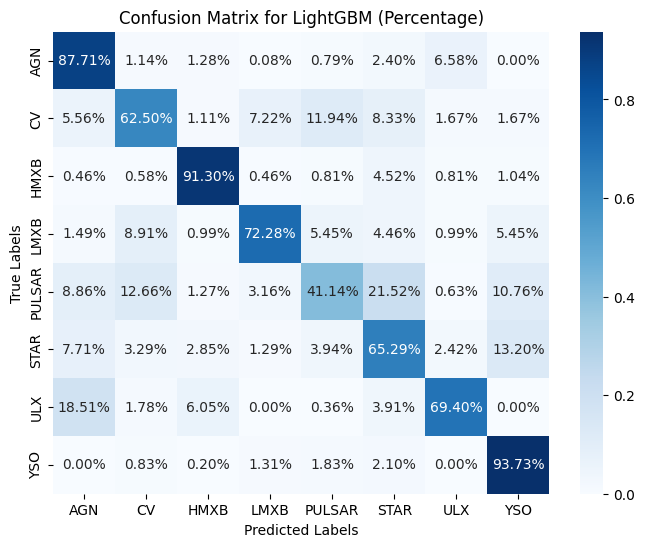

Classification Report:
              precision    recall  f1-score   support

         AGN       0.91      0.88      0.89      4907
          CV       0.45      0.62      0.52       360
        HMXB       0.78      0.91      0.84       862
        LMXB       0.53      0.72      0.61       202
      PULSAR       0.17      0.41      0.24       158
        STAR       0.91      0.65      0.76      4590
         ULX       0.30      0.69      0.42       281
         YSO       0.78      0.94      0.85      2520

    accuracy                           0.80     13880
   macro avg       0.60      0.73      0.64     13880
weighted avg       0.84      0.80      0.81     13880



In [6]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap with percentage values
class_names = label_encoder.classes_
plt.figure(figsize=(8, 6))
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
sns.heatmap(conf_matrix_percentage, annot=True, cmap='Blues', fmt='.2%', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LightGBM (Percentage)')
plt.show()

# Print classification report
class_report = classification_report(y_labels, y_pred_labels)
print("Classification Report:")
print(class_report)